In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dftrain = pd.read_csv('avila-tr.txt', sep=",", header=None)


In [3]:
dftrain

,0,1,2,3,4,5,6,7,8,9,10
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [4]:
cl=["intercolumnar distance", "upper margin", "lower margin", "exploitation", "row number", "modular ratio", "interlinear spacing", "weight", "peak number", "modular ratio/ interlinear spacing","Class"]

In [5]:
dftrain.columns = cl
dftrain

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [6]:
dftest = pd.read_csv('avila-ts.txt', sep=",", header=None)
dftest.columns = cl
dftest

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,Class
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


In [7]:
# inspect numerical features
dftrain.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [8]:
# inspect numerical features
dftest.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,-0.000852,0.003396,0.005181,0.002616,-0.006365,-0.008886,0.002350,-0.010259,-0.008691,-0.000678
std,1.008551,0.955257,0.992430,0.991443,1.007876,1.000360,0.966827,0.996431,1.001240,0.992928
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.090167,-4.737863,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.526838,0.172340,-0.598658,-0.044076,-0.547709,-0.372457,-0.514199
50%,0.056229,-0.063555,0.217845,0.087408,0.261718,-0.058835,0.220177,0.103541,0.064084,-0.020397
75%,0.204355,0.203385,0.356544,0.627208,0.261718,0.564038,0.446679,0.639426,0.500624,0.526304
max,11.819916,19.470188,7.458681,3.987152,1.066121,12.315569,4.901228,4.580832,3.213413,11.911338


In [9]:
# inspect categorical features 
dftrain.describe(include='object')

,Class
count,10430
unique,12
top,A
freq,4286


In [10]:
# inspect categorical features 
dftest.describe(include='object')

,Class
count,10437
unique,12
top,A
freq,4286


In [11]:
# lets check the datatypes
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430 entries, 0 to 10429
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   intercolumnar distance              10430 non-null  float64
 1   upper margin                        10430 non-null  float64
 2   lower margin                        10430 non-null  float64
 3   exploitation                        10430 non-null  float64
 4   row number                          10430 non-null  float64
 5   modular ratio                       10430 non-null  float64
 6   interlinear spacing                 10430 non-null  float64
 7   weight                              10430 non-null  float64
 8   peak number                         10430 non-null  float64
 9   modular ratio/ interlinear spacing  10430 non-null  float64
 10  Class                               10430 non-null  object 
dtypes: float64(10), object(1)
memory usage: 8

In [12]:
# lets check the datatypes
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10437 entries, 0 to 10436
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   intercolumnar distance              10437 non-null  float64
 1   upper margin                        10437 non-null  float64
 2   lower margin                        10437 non-null  float64
 3   exploitation                        10437 non-null  float64
 4   row number                          10437 non-null  float64
 5   modular ratio                       10437 non-null  float64
 6   interlinear spacing                 10437 non-null  float64
 7   weight                              10437 non-null  float64
 8   peak number                         10437 non-null  float64
 9   modular ratio/ interlinear spacing  10437 non-null  float64
 10  Class                               10437 non-null  object 
dtypes: float64(10), object(1)
memory usage: 8

# Check Correlation among features

In [13]:
dftrain.corr()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
intercolumnar distance,1.000000,-0.037577,0.034473,-0.065338,0.451966,-0.044663,-0.001173,-0.043336,0.059427,-0.002839
upper margin,-0.037577,1.000000,0.414578,0.002026,-0.067759,0.424384,0.582443,0.041227,0.349011,-0.024810
lower margin,0.034473,0.414578,1.000000,0.143608,0.011333,0.132723,0.289165,0.034970,0.193194,-0.045392
exploitation,-0.065338,0.002026,0.143608,1.000000,0.096426,0.257627,0.043915,0.338970,0.281239,0.323915
row number,0.451966,-0.067759,0.011333,0.096426,1.000000,0.039824,0.026447,-0.071220,0.274883,0.151590
modular ratio,-0.044663,0.424384,0.132723,0.257627,0.039824,1.000000,0.462871,-0.059628,0.214207,0.755992
interlinear spacing,-0.001173,0.582443,0.289165,0.043915,0.026447,0.462871,1.000000,0.002444,0.272458,0.263015
weight,-0.043336,0.041227,0.034970,0.338970,-0.071220,-0.059628,0.002444,1.000000,0.487543,-0.016045
peak number,0.059427,0.349011,0.193194,0.281239,0.274883,0.214207,0.272458,0.487543,1.000000,0.186226
modular ratio/ interlinear spacing,-0.002839,-0.024810,-0.045392,0.323915,0.151590,0.755992,0.263015,-0.016045,0.186226,1.000000


In [14]:
dftrainx=dftrain.drop(['Class'],axis=1)

In [15]:
dftrainy=dftrain['Class']

In [16]:
dftestx=dftest.drop(['Class'],axis=1)

In [17]:
dftesty=dftest['Class']

In [18]:
# find class distribution in trainset
dftrainy.value_counts()

A    4286
F    1961
E    1095
I     831
X     522
H     519
G     446
D     352
Y     266
C     103
W      44
B       5
Name: Class, dtype: int64

In [19]:
# find class distribution in trainset
dftesty.value_counts()

A    4286
F    1962
E    1095
I     832
X     522
H     520
G     447
D     353
Y     267
C     103
W      45
B       5
Name: Class, dtype: int64

In [20]:
# We would have sepertaed data into categorical and numerical features if we had such but here no x variable is categorical so we doen need to.
# Good code for it
# num=X.select_dtypes(include="number")
# char=X.select_dtypes(include="object")

# Data Preprocessing

In [21]:
# I ran into a dilemma whether to trat missing value before or after oulier analysis
# here is some refrence i found
# what-should-we-care-about-first-the-outliers-or-the-missing-values?
# Outliers, generally.

# Missing values are handled through imputation, which depends upon the existing data. Outliers influence the existing data, and thus they should be handled before imputing missing values.

# Handling the outliers is a matter of investigating and understanding them, making your best determination of what caused them and what they mean, then handling them appropriately. Some 
# outliers may be valid, others may need to be removed as the result of error, but this must be a careful, conservative process because removing outliers changes the distribution of the data.

# Outlier Analysis of Numerical Features

In [22]:
dftrainx.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
1%,-3.498799,-2.426761,-3.210528,-2.809808,-4.922215,-2.467276,-3.177361,-2.928853,-3.356836,-2.835233
5%,-0.585651,-0.620989,-3.210528,-1.815842,-1.347089,-1.429155,-1.591843,-1.778168,-1.900349,-1.404650
10%,-0.326430,-0.416858,-0.109344,-1.203923,-0.900198,-1.096956,-1.138838,-1.252492,-1.089631,-0.999471
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855


In [23]:
dftestx.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,-0.000852,0.003396,0.005181,0.002616,-0.006365,-0.008886,0.002350,-0.010259,-0.008691,-0.000678
std,1.008551,0.955257,0.992430,0.991443,1.007876,1.000360,0.966827,0.996431,1.001240,0.992928
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.090167,-4.737863,-6.719324
1%,-3.498799,-2.426761,-3.210528,-2.624155,-4.922215,-2.535376,-3.239272,-3.034484,-3.303515,-3.017850
5%,-0.597995,-0.613138,-3.210528,-1.790689,-1.436467,-1.429155,-1.554093,-1.854238,-1.993893,-1.377045
10%,-0.326430,-0.401156,-0.095119,-1.203923,-0.900198,-1.096956,-1.101088,-1.283898,-1.120812,-0.995408
25%,-0.128929,-0.259834,0.064919,-0.526838,0.172340,-0.598658,-0.044076,-0.547709,-0.372457,-0.514199
50%,0.056229,-0.063555,0.217845,0.087408,0.261718,-0.058835,0.220177,0.103541,0.064084,-0.020397
75%,0.204355,0.203385,0.356544,0.627208,0.261718,0.564038,0.446679,0.639426,0.500624,0.526304


In [24]:
# We notice in both train and testset there is presence of outliers by inspecting them visually

In [25]:
# Capping and Flooring of outliers through clipping

In [26]:
# We make a function for outlier capping and analysis
def outlier_capping_flooring(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [27]:
dftrainx=dftrainx.apply(lambda x : outlier_capping_flooring(x))

In [28]:
dftestx=dftestx.apply(lambda x : outlier_capping_flooring(x))

In [29]:
# lets check again

In [30]:
dftrainx.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,-0.039069,-0.061200,-0.031236,0.005354,0.006018,0.009302,0.018632,0.008941,0.010871,0.011607
std,0.758511,0.469464,0.925731,0.948531,0.991694,0.955100,0.804039,0.967995,0.978565,0.921181
min,-3.498799,-2.426761,-3.210528,-2.809808,-4.922215,-2.467276,-3.177361,-2.928853,-3.356836,-2.835233
1%,-3.498799,-2.426761,-3.210528,-2.809808,-4.922215,-2.467276,-3.177361,-2.928701,-3.350415,-2.835215
5%,-0.585651,-0.620989,-3.210528,-1.815842,-1.347089,-1.429155,-1.591843,-1.778168,-1.900349,-1.404650
10%,-0.326430,-0.416858,-0.109344,-1.203923,-0.900198,-1.096956,-1.138838,-1.252492,-1.089631,-0.999471
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855


In [31]:
dftestx.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000,10437.000000
mean,-0.041828,-0.049953,-0.020839,0.009770,-0.006596,-0.009353,0.020859,-0.011248,-0.007781,0.004479
std,0.767539,0.472700,0.908088,0.931296,1.007640,0.941331,0.788373,0.971593,0.982491,0.908927
min,-3.498799,-2.426761,-3.210528,-2.624155,-4.922215,-2.535376,-3.239272,-3.034484,-3.303515,-3.017850
1%,-3.498799,-2.426761,-3.210528,-2.624155,-4.922215,-2.525809,-3.230574,-3.034180,-3.303515,-3.016928
5%,-0.597995,-0.613138,-3.210528,-1.790689,-1.436467,-1.429155,-1.554093,-1.854238,-1.993893,-1.377045
10%,-0.326430,-0.401156,-0.095119,-1.203923,-0.900198,-1.096956,-1.101088,-1.283898,-1.120812,-0.995408
25%,-0.128929,-0.259834,0.064919,-0.526838,0.172340,-0.598658,-0.044076,-0.547709,-0.372457,-0.514199
50%,0.056229,-0.063555,0.217845,0.087408,0.261718,-0.058835,0.220177,0.103541,0.064084,-0.020397
75%,0.204355,0.203385,0.356544,0.627208,0.261718,0.564038,0.446679,0.639426,0.500624,0.526304


# Missing Value Analysis

In [32]:
dftrainx.isnull().sum()

intercolumnar distance                0
upper margin                          0
lower margin                          0
exploitation                          0
row number                            0
modular ratio                         0
interlinear spacing                   0
weight                                0
peak number                           0
modular ratio/ interlinear spacing    0
dtype: int64

In [33]:
dftrainy.isnull().sum()

0

In [34]:
dftestx.isnull().sum()

intercolumnar distance                0
upper margin                          0
lower margin                          0
exploitation                          0
row number                            0
modular ratio                         0
interlinear spacing                   0
weight                                0
peak number                           0
modular ratio/ interlinear spacing    0
dtype: int64

In [35]:
dftesty.isnull().sum()

0

In [36]:
# No outliers found in data

# Feature Selection - Numerical Features 

# Remove Features with 0 Variance

In [37]:
# Good articlew on variace threshold
# https://medium.com/nerd-for-tech/removing-constant-variables-feature-selection-463e2d6a30d9#:~:text=Variance%20Threshold%20is%20a%20feature,be%20used%20for%20unsupervised%20learning.
# Defining and Fitting Threshold
# For quasi-constant features, that have the same value for a very large subset, using a threshold of 0.01 would mean dropping the column where 99% of the values are similar.

In [38]:
# We know if a feature have very low variance then its is a bad predictor
# So we will specify a variance threshold 

In [39]:
dftrainx.var()

intercolumnar distance                0.575340
upper margin                          0.220397
lower margin                          0.856978
exploitation                          0.899711
row number                            0.983456
modular ratio                         0.912215
interlinear spacing                   0.646478
weight                                0.937015
peak number                           0.957590
modular ratio/ interlinear spacing    0.848575
dtype: float64

In [40]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0.05)
varselector.fit_transform(dftrainx)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
dftrainx = dftrainx.iloc[:,cols]

In [41]:
dftestx.var()

intercolumnar distance                0.589116
upper margin                          0.223445
lower margin                          0.824624
exploitation                          0.867311
row number                            1.015338
modular ratio                         0.886105
interlinear spacing                   0.621533
weight                                0.943993
peak number                           0.965288
modular ratio/ interlinear spacing    0.826148
dtype: float64

In [42]:
dftrainx

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.352689,0.636203,0.282354,0.515587
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652
...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134
10427,0.229043,-0.000745,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969


In [43]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0.05)
varselector.fit_transform(dftrainx)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
dftestx = dftestx.iloc[:,cols]

In [44]:
dftestx

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758
2,0.759828,-1.304042,-0.023991,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681
...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,-0.044076,1.158458,2.246787,-0.699884
10433,0.266074,0.556689,-0.020434,0.176624,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245
10434,-0.054866,0.580242,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329


# Bi Variate Analysis (Feature Discretization)

In [45]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
dftrainx_binned=pd.DataFrame(discrete.fit_transform(dftrainx),index=dftrainx.index, columns=dftrainx.columns).add_suffix('_Rank')
dftrainx_binned.head()

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


,intercolumnar distance_Rank,upper margin_Rank,lower margin_Rank,exploitation_Rank,row number_Rank,modular ratio_Rank,interlinear spacing_Rank,weight_Rank,peak number_Rank,modular ratio/ interlinear spacing_Rank
0,8.0,3.0,6.0,6.0,2.0,6.0,7.0,8.0,6.0,5.0
1,6.0,9.0,0.0,4.0,3.0,9.0,9.0,7.0,6.0,7.0
2,2.0,6.0,2.0,1.0,3.0,7.0,2.0,1.0,3.0,7.0
3,4.0,8.0,0.0,2.0,1.0,3.0,9.0,8.0,7.0,2.0
4,7.0,9.0,1.0,4.0,3.0,6.0,8.0,4.0,4.0,4.0


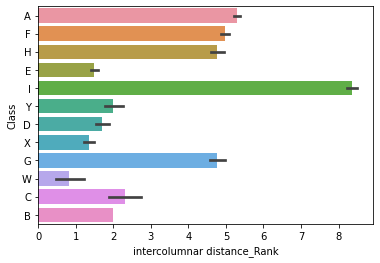

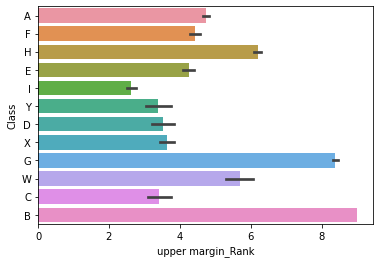

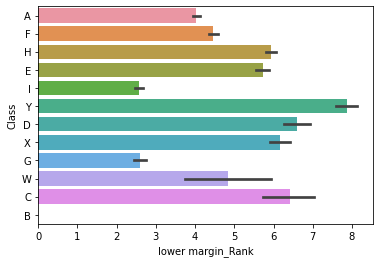

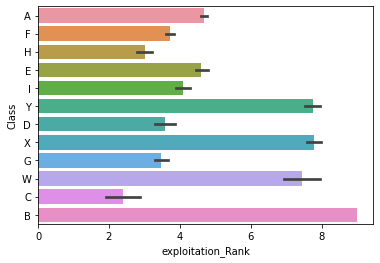

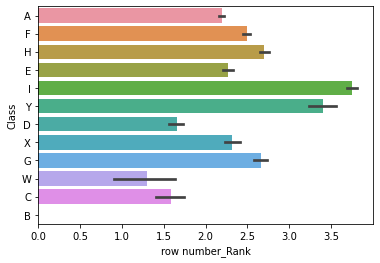

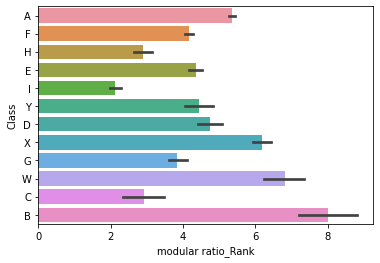

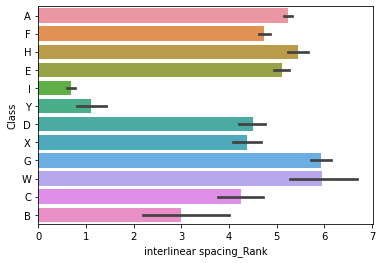

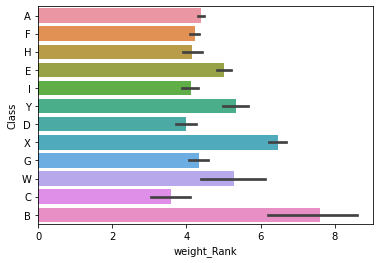

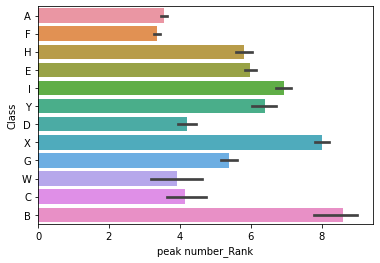

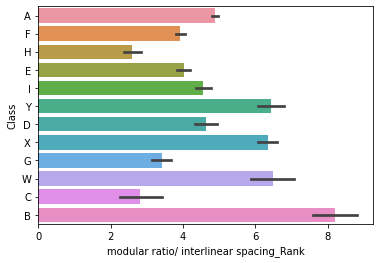

In [46]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

X_bin_combined=pd.concat([dftrainy,dftrainx_binned],axis=1,join='inner')

from numpy import mean
for col in (dftrainx_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="Class",data=X_bin_combined, estimator=mean)
plt.show()

In [47]:
# All features from dftrainx will get selected as no flat curve was found and it may carry information
select_features_dftrainx=dftrainx

In [48]:
# We now check in the test set

In [49]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
dftestx_binned=pd.DataFrame(discrete.fit_transform(dftestx),index=dftestx.index, columns=dftestx.columns).add_suffix('_Rank')
dftestx_binned.head()

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_discretization.py:220: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn('Bins whose width are too small (i.e., <= '


,intercolumnar distance_Rank,upper margin_Rank,lower margin_Rank,exploitation_Rank,row number_Rank,modular ratio_Rank,interlinear spacing_Rank,weight_Rank,peak number_Rank,modular ratio/ interlinear spacing_Rank
0,0.0,7.0,5.0,9.0,0.0,8.0,4.0,3.0,3.0,8.0
1,7.0,1.0,6.0,6.0,0.0,0.0,5.0,5.0,9.0,0.0
2,9.0,0.0,1.0,1.0,1.0,3.0,1.0,2.0,7.0,5.0
3,4.0,8.0,6.0,3.0,0.0,1.0,1.0,9.0,8.0,2.0
4,5.0,6.0,3.0,5.0,4.0,7.0,9.0,3.0,2.0,5.0


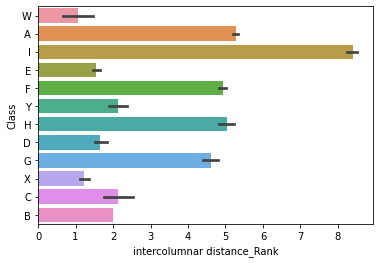

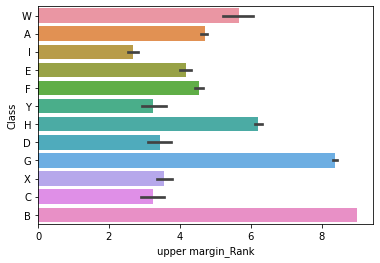

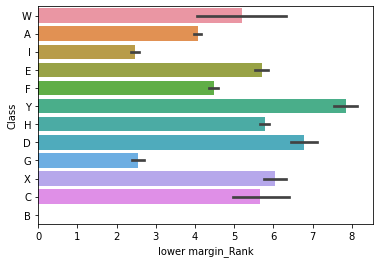

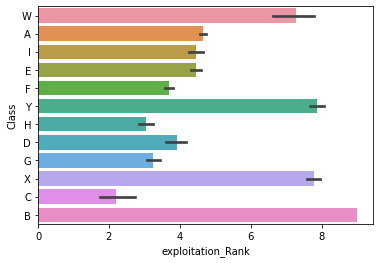

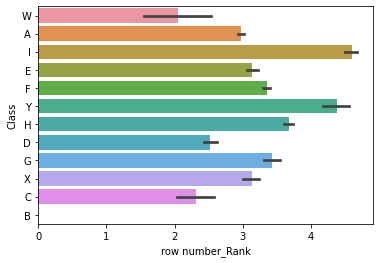

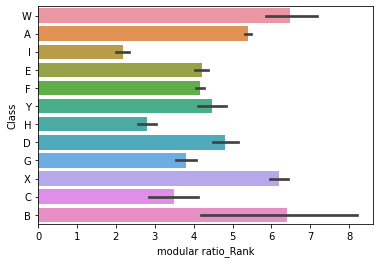

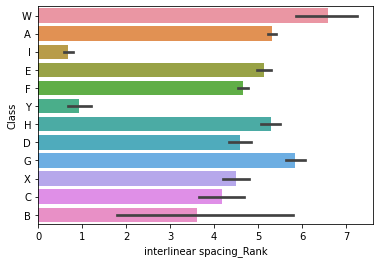

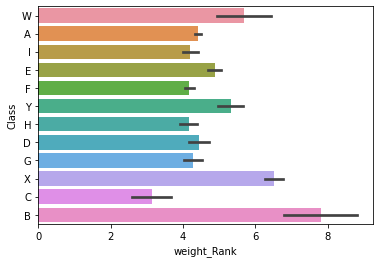

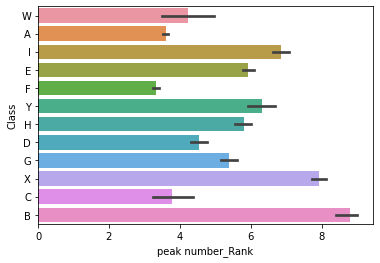

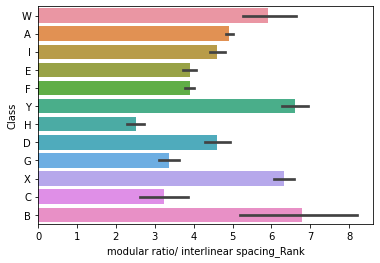

In [50]:
Xtest_bin_combined=pd.concat([dftesty,dftestx_binned],axis=1,join='inner')

from numpy import mean
for col in (dftestx_binned.columns):
    plt.figure()
    sns.barplot(x=col, y="Class",data=Xtest_bin_combined, estimator=mean)
plt.show()

In [51]:
# All features from dftrainx will get selected as no flat curve was found and it may carry information
select_features_dftestx=dftestx

# Creating the Master Feature Set for Model Development

In [52]:
# We dont need to do traintest split since already data splitted into 4 parts.gtrainxtrainy,testx,testy

In [53]:
print("Shape of Training Data",dftrainx.shape)
print("Shape of Testing Data",dftestx.shape)

Shape of Training Data (10430, 10)
Shape of Testing Data (10437, 10)


In [54]:
# Non Linearity in feature relationships are observed which makes tree methods a good choice
# There are few options to consider among tree methods
# White Box (Completely Explainable Set of Rules) - Decision Tree
# Ensemble Methods - Random Forest (With Bagging)
# Ensemble Methods - GBM/XGBoost (Boosting)

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0,max_iter=3000)
logreg.fit(dftrainx,dftrainy)

LogisticRegression(max_iter=3000, random_state=0)

In [56]:
# Inspect the coefficinets
coeff_df=pd.DataFrame(dftrainx.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,intercolumnar distance,1.015330
1,upper margin,-0.791898
2,lower margin,-0.557748
3,exploitation,-0.410073
4,row number,-0.598590
5,modular ratio,1.324917
6,interlinear spacing,0.328474
7,weight,0.873698
8,peak number,-1.494908
9,modular ratio/ interlinear spacing,-1.047113


# Decision Tree

In [57]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=0)

In [58]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [i for i in range(3,51,2)] , 'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(dftrainx,dftrainy) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

d:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Best Parameters using grid search: 
 {'max_depth': 21, 'min_samples_split': 50}


In [59]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
dtree.fit(dftrainx,dftrainy)

DecisionTreeClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [60]:
# Visualising the tree

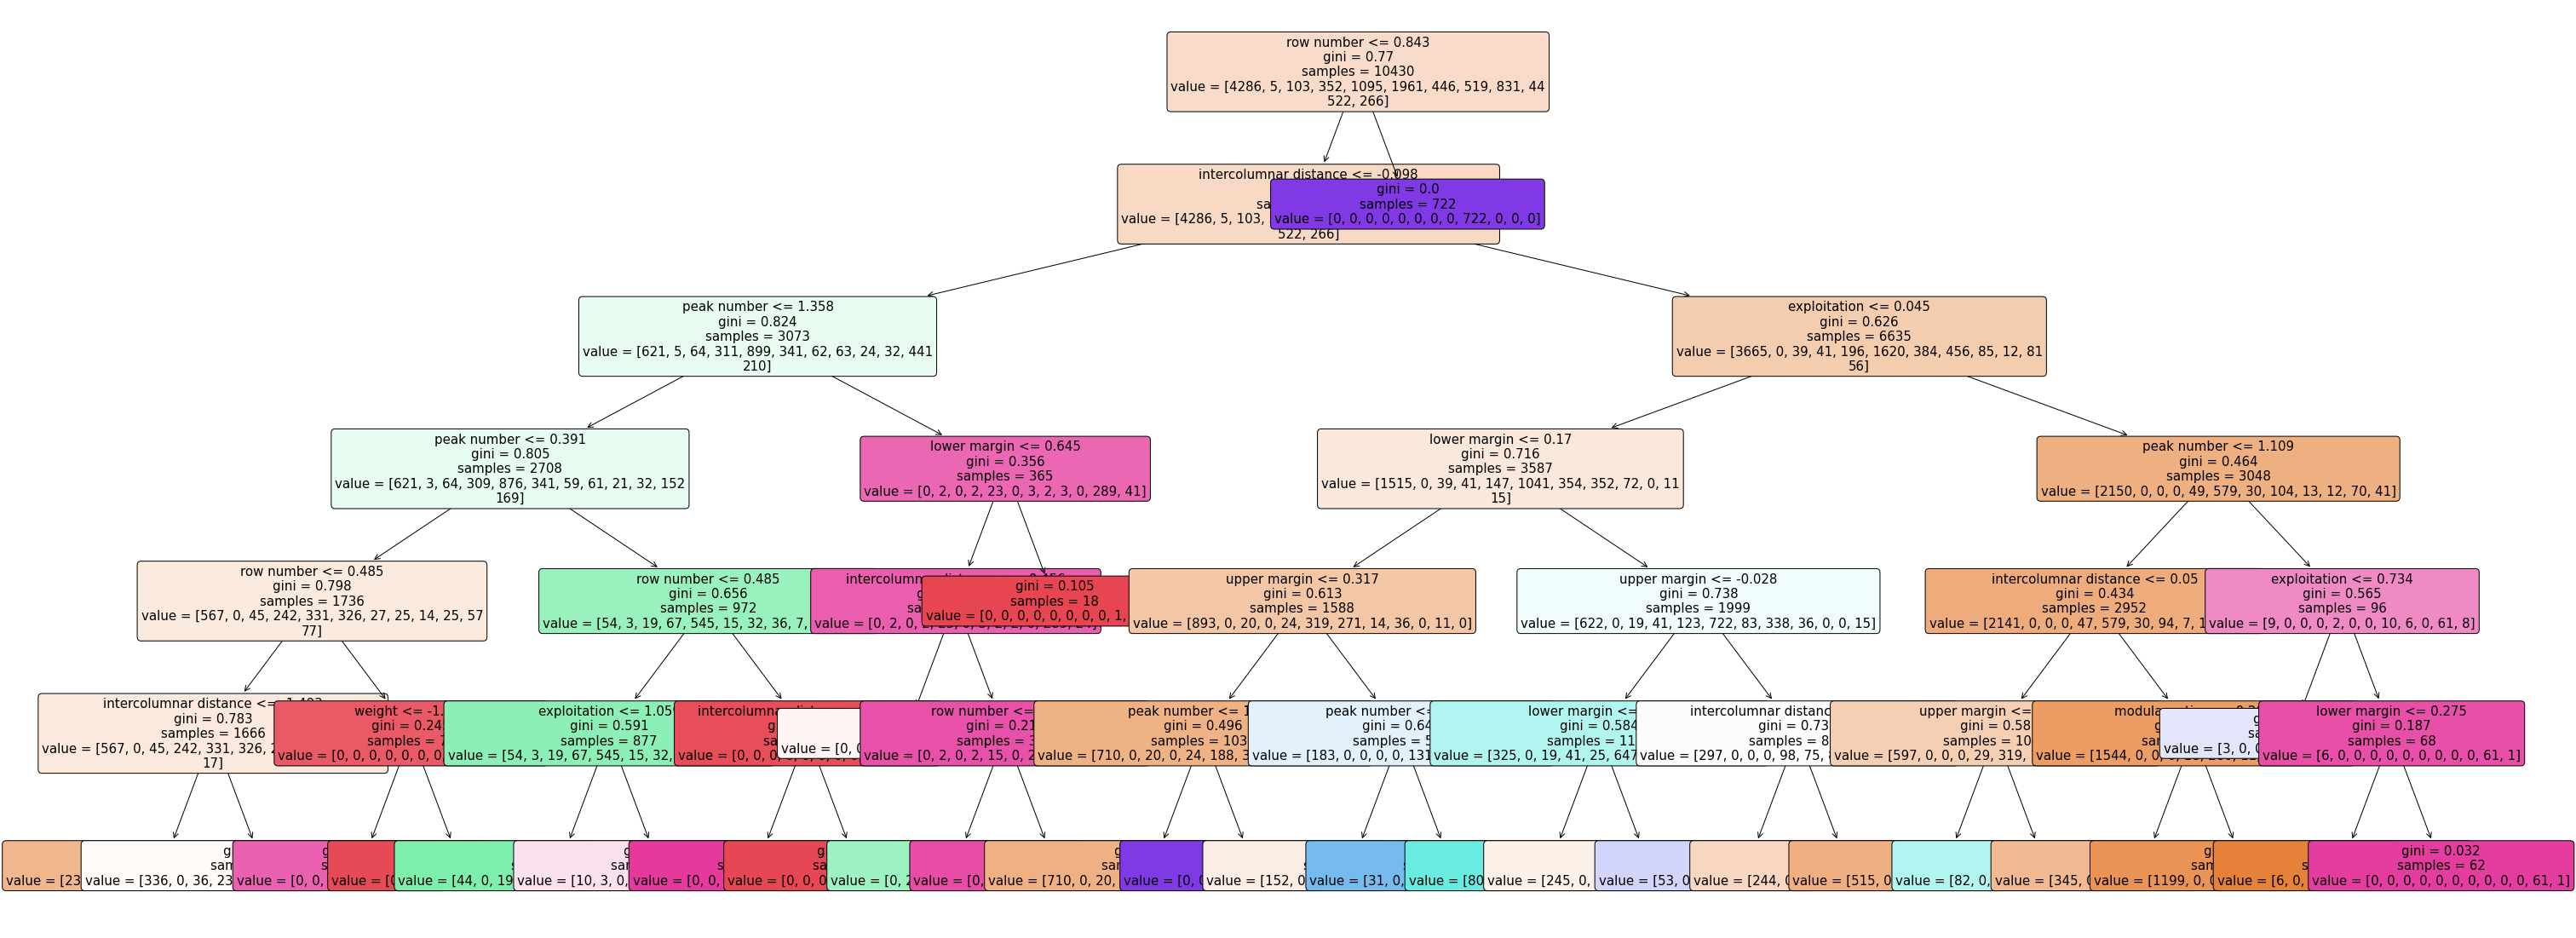

In [61]:
from sklearn import tree
# import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,20])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=dftrainx.columns)
plt.show()

In [62]:
import pandas as pd
feature_importances=pd.DataFrame(dtree.feature_importances_,
                                 index=dftrainx.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
row number,0.325736
intercolumnar distance,0.227965
peak number,0.170640
upper margin,0.115459
lower margin,0.075914
exploitation,0.073928
modular ratio,0.008336
weight,0.002023
interlinear spacing,0.000000
modular ratio/ interlinear spacing,0.000000


# Random Forest

In [63]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)
rf.fit(dftrainx,dftrainy)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [64]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=dftrainx.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
row number,0.239078
intercolumnar distance,0.214327
peak number,0.185587
interlinear spacing,0.090617
lower margin,0.071846
exploitation,0.068957
upper margin,0.063031
modular ratio,0.038595
modular ratio/ interlinear spacing,0.024160
weight,0.003802


# Gradiant Boosting Model

In [65]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)
gbm.fit(dftrainx,dftrainy)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [66]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=dftrainx.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
intercolumnar distance,0.196634
row number,0.173490
exploitation,0.151739
lower margin,0.147610
upper margin,0.140838
peak number,0.123061
modular ratio,0.037931
interlinear spacing,0.014251
weight,0.008949
modular ratio/ interlinear spacing,0.005496


# Ensemble models

# Stacking ensemble using xgboost

In [67]:
from sklearn.ensemble import StackingClassifier


In [68]:
import xgboost

In [69]:
from xgboost import XGBClassifier

In [ ]:
KNeighborsClassifier(n_neighbors=5)

In [ ]:
[
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)),
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50))  
                       ] 

In [127]:
base_learners=[
                        ('dt', DecisionTreeClassifier(criterion='entropy',random_state=22,max_depth=4,min_samples_split=20)),('kn',KNeighborsClassifier(n_neighbors=5)),
                        ('rf', RandomForestClassifier(criterion='gini',random_state=0,max_depth=6,min_samples_split=50)),
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=0,max_depth=6,min_samples_split=50)) 
                       ] 

In [128]:
clf = StackingClassifier(estimators=base_learners, final_estimator=XGBClassifier(n_estimators=3000, max_depth=5, 
                    learning_rate=0.01, booster='gbtree', 
                    n_jobs=-2, gpu_id=0))

In [129]:
clf.fit(dftrainx, dftrainy)

[21:03:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:248: No visible GPU is found, setting `gpu_id` to -1


StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=4,
                                                       min_samples_split=20,
                                                       random_state=22)),
                               ('kn', KNeighborsClassifier()),
                               ('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_split=50,
                                                       random_state=0)),
                               ('gbm',
                                GradientBoostingClassifier(criterion='mse',
                                                           max_depth=6,
                                                           min_samples_split=50,
                                                           random_state=0))],
  

# Bagging Ensemble Using KNN

In [73]:
from sklearn.ensemble import BaggingClassifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
kn1=KNeighborsClassifier(n_neighbors=5)

In [98]:
bc = BaggingClassifier(base_estimator=kn1,n_estimators=200,random_state=21)

In [99]:
bc.fit(dftrainx, dftrainy)

BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=200,
                  random_state=21)

# Model Evaluation

In [130]:
# Model Evaluation
y_pred_logreg=logreg.predict(dftestx)

In [131]:
y_pred_tree=dtree.predict(dftestx)

In [132]:
y_pred_rf=rf.predict(dftestx)

In [133]:
y_pred_gbm=gbm.predict(dftestx)

In [134]:
y_pred_stacking=clf.predict(dftestx)

In [135]:
y_pred_bagging=bc.predict(dftestx)

In [79]:
# Good article on chossing performance metric for multiclass classification
# https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd#:~:text=Generally%2C%20values%20over%200.7%20are,Image%20by%20Sklearn.

In [80]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [81]:
# Logistic regression performance evaluation
print("Accuracy:",metrics.accuracy_score(dftesty, y_pred_logreg))
print("Precision",metrics.precision_score(dftesty,y_pred_logreg,average='weighted'))
print("Recall",metrics.recall_score(dftesty,y_pred_logreg,average='weighted'))
print("f1_score",metrics.f1_score(dftesty,y_pred_logreg,average='weighted'))
print("cohen_kappa_score",metrics.cohen_kappa_score(dftesty,y_pred_logreg))
# cohen_kappa_score(y_test, y_pred)

Accuracy: 0.5734406438631791
Precision 0.5250376295530665
Recall 0.5734406438631791
f1_score 0.5098827482235306
cohen_kappa_score 0.38569125612459176


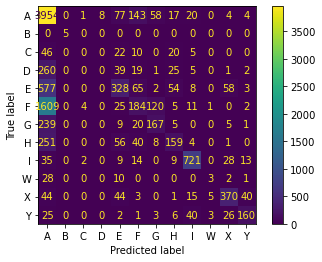

In [82]:
metrics.plot_confusion_matrix(logreg,dftrainx,dftrainy)

In [83]:
# Confusion matrix is too confusing here

In [84]:
# DecisionTree Performance Evaluation
print("Accuracy:",metrics.accuracy_score(dftesty, y_pred_tree))
print("Precision",metrics.precision_score(dftesty,y_pred_tree,average='weighted'))
print("Recall",metrics.recall_score(dftesty,y_pred_tree,average='weighted'))
print("f1_score",metrics.f1_score(dftesty,y_pred_tree,average='weighted'))
print("cohen_kappa_score",metrics.cohen_kappa_score(dftesty,y_pred_tree))


Accuracy: 0.6339944428475616
Precision 0.6268046445978448
Recall 0.6339944428475616
f1_score 0.5937295465611074
cohen_kappa_score 0.4756951415163926


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
# metrics.plot_confusion_matrix(dtree,dftrainx,dftrainy)

In [86]:
# Randomforest Performance Evaluation
print("Accuracy:",metrics.accuracy_score(dftesty, y_pred_rf))
print("Precision",metrics.precision_score(dftesty,y_pred_rf,average='weighted'))
print("Recall",metrics.recall_score(dftesty,y_pred_rf,average='weighted'))
print("f1_score",metrics.f1_score(dftesty,y_pred_rf,average='weighted'))
print("cohen_kappa_score",metrics.cohen_kappa_score(dftesty,y_pred_rf))


Accuracy: 0.6665708536935901
Precision 0.7198662357376112
Recall 0.6665708536935901
f1_score 0.6139442425000947
cohen_kappa_score 0.5182308533733122


d:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
# metrics.plot_confusion_matrix(rf,dftrainx,dftrainy)

In [136]:
# GBM Performance Evaluation
print("Accuracy:",metrics.accuracy_score(dftesty, y_pred_gbm))
print("Precision",metrics.precision_score(dftesty,y_pred_gbm,average='weighted'))
print("Recall",metrics.recall_score(dftesty,y_pred_gbm,average='weighted'))
print("f1_score",metrics.f1_score(dftesty,y_pred_gbm,average='weighted'))
print("cohen_kappa_score",metrics.cohen_kappa_score(dftesty,y_pred_gbm))

Accuracy: 0.9970297978346269
Precision 0.9970358710721984
Recall 0.9970297978346269
f1_score 0.997027513019121
cohen_kappa_score 0.9961404265066871


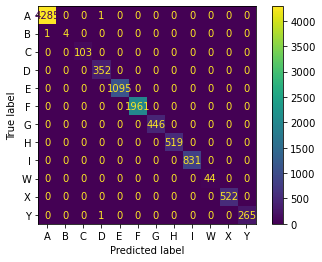

In [137]:
metrics.plot_confusion_matrix(gbm,dftrainx,dftrainy)

In [138]:
# Stacking XGBoost on Decision Tree Performance Evaluation
print("Accuracy:",metrics.accuracy_score(dftesty, y_pred_stacking))
print("Precision",metrics.precision_score(dftesty,y_pred_stacking,average='weighted'))
print("Recall",metrics.recall_score(dftesty,y_pred_stacking,average='weighted'))
print("f1_score",metrics.f1_score(dftesty,y_pred_stacking,average='weighted'))
print("cohen_kappa_score",metrics.cohen_kappa_score(dftesty,y_pred_stacking))


Accuracy: 0.997413049726933
Precision 0.9974214764334679
Recall 0.997413049726933
f1_score 0.997412626645519
cohen_kappa_score 0.9966386906047932


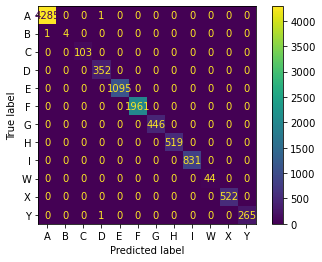

In [139]:
metrics.plot_confusion_matrix(clf,dftrainx,dftrainy)

In [140]:
# baggingclassifier on Knn Performance Evaluation
print("Accuracy:",metrics.accuracy_score(dftesty, y_pred_bagging))
print("Precision",metrics.precision_score(dftesty,y_pred_bagging,average='weighted'))
print("Recall",metrics.recall_score(dftesty,y_pred_bagging,average='weighted'))
print("f1_score",metrics.f1_score(dftesty,y_pred_bagging,average='weighted'))
print("cohen_kappa_score",metrics.cohen_kappa_score(dftesty,y_pred_bagging))

Accuracy: 0.7540480981124844
Precision 0.7558815445081882
Recall 0.7540480981124844
f1_score 0.7504157773782449
cohen_kappa_score 0.6723314301484942


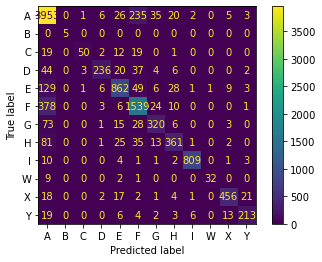

In [141]:
metrics.plot_confusion_matrix(bc,dftrainx,dftrainy)